## 1. Pandas Series
In diesem Abschnitt lernen wir ein sehr nützliches Python-Package kennen: `pandas`. Mit `pandas` können wir Tabellen einlesen, verarbeiten und abspeichern. Dabei fokussieren wir uns zuerst auf eine konkrete Klasse im Pandas-Modul: `Series`.

### 1.1 Installation und Import
`pandas` ist nicht Teil von der Python-Standardinstallation und muss zuerst in der Shell mit 
```
pip install pandas
```
installiert werden.

Wir importieren `pandas` typischerweise wie folgt:

In [1]:
import pandas as pd

### 1.2 Eine erste Pandas Series
Pandas stellt uns verschiedene Klassen zur Verfügung, sowie auch zahlreiche Funktionen, welche diese Klassen verarbeiten können. Eine wichtige Klasse sind `Series`. Sie sind ähnlich wie Listen, da sie eine Sequenz von Daten abspeichern und verarbeiten können. Allerdings haben sie deutlich mehr Funktionalitäten.

Eine Series erstellen wir wie folgt:

In [2]:
series = pd.Series([2, 5, 3, 4, 1, 7])

series

0    2
1    5
2    3
3    4
4    1
5    7
dtype: int64

Unser Series-Objekt hat zahlreiche nützliche Methoden, welche z.B. den Durchschnitt oder den Median berechnen können:

In [3]:
print("Mean:   ", series.mean())
print("Median: ", series.median())

# Aber auch Summe, Min und Max sind als Methoden definiert
print("Sum:    ", series.sum())
print("Min:    ", series.min())


Mean:    3.6666666666666665
Median:  3.5
Sum:     22
Min:     1


Wir können Series multiplizieren oder addieren:

In [4]:
series + 2

0    4
1    7
2    5
3    6
4    3
5    9
dtype: int64

In [5]:
series * 2

0     4
1    10
2     6
3     8
4     2
5    14
dtype: int64

In [6]:
series + series

0     4
1    10
2     6
3     8
4     2
5    14
dtype: int64

Sehr nützlich ist auch, dass Vergleiche für jedes Element einzeln durchgeführt werden. Zurückgegeben wird anschliessend eine neue Series, welches für jedes Series-Element True oder False enthält.

In [7]:
series < 5

0     True
1    False
2     True
3     True
4     True
5    False
dtype: bool

In [8]:
series == 3

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

Wir können auch zwei Series miteinander vergleichen:

In [9]:
series1 = pd.Series([1, 2, 3])
series2 = pd.Series([1, 4, 2])
series1 == series2

0     True
1    False
2    False
dtype: bool

In [10]:
series1 <= series2

0     True
1     True
2    False
dtype: bool

Die Vergleichsoperationen geben uns jeweils Series mit `bool`-Werten zurück. Für solche Series können wir auch logische Operationen `and`, `or` und `not` berechnen. Allerdings nicht mit diesen Stichworten, sondern mit:
- `~` für "not"
- `&` für "and"
- `|` für "or"

In [11]:
bool_example = pd.Series([True, False, True])
bool_example

0     True
1    False
2     True
dtype: bool

In [12]:
~bool_example

0    False
1     True
2    False
dtype: bool

In [13]:
bool_example = pd.Series([True, False, True])
bool_example2 = pd.Series([True, True, False])

bool_example | bool_example2

0    True
1    True
2    True
dtype: bool

In [14]:
bool_example & bool_example2

0     True
1    False
2    False
dtype: bool

Wir können auch Series mit sehr vielen anderen Datentypen, wie z.B. Strings haben:

In [15]:
series = pd.Series(["a", "b", "b", "c"])

Mit `value_counts` können wir zählen, wie häufig jedes Element der String vorkommt:

In [16]:
series.value_counts()

b    2
a    1
c    1
dtype: int64

### 1.2 Der Index
Jede Series hat einen Index: Dies sind die Zahlen (bis jetzt 0-5), welche in der Darstellung der Series jeweils am linken Rand standen. Falls wir dies wollen, können wir den Index bei der Erstellung der Series selbst setzen:

In [17]:
series2 = pd.Series([42, 32, 51], index=["hans", "ueli", "aschi"])

series2

hans     42
ueli     32
aschi    51
dtype: int64

Der Index ist übrigens im Attribut `.index` abgespeichert, wenn wir darauf zugreifen wollen:

In [18]:
series2.index

Index(['hans', 'ueli', 'aschi'], dtype='object')

Wir können mit eckigen Klammern auf Elemente der Series zugreifen. Wir müssen dabei den Index des Elements angeben, auf welches wir zugreifen wollen.

Bei unserem Objekt `series` ist der Index 0-5, daher können wir so auf das dritte Element zugreifen:

In [19]:
series = pd.Series([2, 5, 3, 4, 1, 7])
series[2]

3

Bei `series2` besteht der Index jedoch aus Strings. Daher sieht der Zugriff wie folgt aus (und erinnert sehr stark an einen Dictionary):

In [20]:
series2["hans"]

42

Wenn wir auf die Elemente der Reihe nach zugreifen wollen, müssen wir das auf dem Attribut `.iloc` tun. Es sieht wie folgt aus:

In [21]:
series2.iloc[2]

51

Wichtig: `.iloc` bedeutet in `pandas` *immer*, dass auf ein Element nach seiner Position, und nicht nach seinem Index zugegriffen wird.

Die Logik hinter dem Index in Pandas ist, dass dieser ein Element stets entgültig identifiziert. Wenn wir mehrere Series haben, sollten jeweils die Elemente mit dem gleichen Index zusammengehören. Nach dieser Logik können wir zum Beispiel zwei Series-Objekte nur vergleichen, wenn sie auch denselben Index haben:


In [22]:
ex1 = pd.Series([1, 2, 3], index=[1, 2, 3])
ex2 = pd.Series([1, 5, 3], index=[1, 2, 3])

# Beide Series haben denselben Index und können zusammengerechnet werden
ex1 == ex2

1     True
2    False
3     True
dtype: bool

Falls der Index nicht übereinstimmt, funktioniert der Vergleich nicht.

In [23]:
ex3 = pd.Series([7, 8, 9], index=[1, 2, 4])  # ein anderer Index

ex1 == ex3 

ValueError: Can only compare identically-labeled Series objects

### 1.4 Eine Series mit einer anderen Series indizieren
Wenn wir eine Series mit `bool`-Werten haben, können wir damit eine andere Series indizieren. Dabei werden nur diejenigen Werte behalten, welche `True` sind.

Hierzu ein Beispiel:

In [24]:
series1 = pd.Series([1, 2, 3])
series2 = pd.Series([True, False, True])

series1[series2]

0    1
2    3
dtype: int64

Es werden also nur diejenigen Elemente von `series1` zurückgegeben, für welche der Eintrag in `series2` `True` ist. Damit können wir sehr einfach eine Series filtern. Der Index wird dabei auch beibehalten - was sehr praktisch ist, wenn wir später nachvollziehen wollen, wohin der Eintrag gehört.

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Nimm folgende Series:

In [25]:
example = pd.Series([-5, 2, 4, -3, 6])

Erstelle eine neue Series, welche nur die positiven Elemente der `example`-Series enthält. Verwende dazu `>` sowie die Indizierung einer Series mit einer anderen Series.

In [26]:
# Code hier

Diese Indizierung funktioniert aber nur, wenn der Index der zwei Series auch übereinstimmt - auch hier stellt der Index also sicher, dass nur Gleiches mit Gleichem indiziert wird.

In [27]:
a = pd.Series([1, 2, 3], index=[0, 1, 2])
b = pd.Series([True, False, True], index=[0, 1, 4])
a[b]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## 2. Pandas DataFrames
`DataFrame`-Objekte sind das Herz von Pandas. Während wir mit Series jeweils nur eine Liste verarbeiten konnten, können `DataFrame`-Objekte ganze Tabellen abspeichern. 

### 2.1 Definition
Wir können ein DataFrame wie folgt definieren:

In [37]:
df = pd.DataFrame(
    [
        [1, 2, 3], 
        [4, 5, 6]
    ]
)

df

,0,1,2
0,1,2,3
1,4,5,6


Ein DataFrame hat (genauso wie Series) einen Index, aber zusätzlich dazu auch noch Spalten, sogenannte `columns`. Wir können auch wieder Index und Column selbst definieren:

In [38]:
df = pd.DataFrame(
    [
        [1, 2, 3], 
        [4, 5, 6]
    ],
    index=["zeile1", "zeile2"],
    columns=["spalte1", "spalte2", "spalte3"]
)

df

,spalte1,spalte2,spalte3
zeile1,1,2,3
zeile2,4,5,6


Mit `[]` können wir wiederum auf einzelne Spalten zugreifen:

In [39]:
df["spalte1"]

zeile1    1
zeile2    4
Name: spalte1, dtype: int64

Und wir sehen: Eine einzelne Spalte wird uns als `Series`-Objekt zurückgegeben.

In [40]:
type(df["spalte1"])

pandas.core.series.Series

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Greife auf das Element mit Spalte "spalte2" und Index "zeile1" von `df` zu.

Wenn wir auf mehrere Spalten gleichzeitig zugreifen wollen, können wir zwei eckige Klammern verwenden:

In [41]:
df[["spalte1", "spalte2"]]

,spalte1,spalte2
zeile1,1,2
zeile2,4,5


### 2.2 Was wir alles machen können
Alles, was wir für Series gesehen haben, können wir auch für DataFrames tun. So zum Beispiel den Mittelwert für alle Spalten berechnen (auch dies wird wieder als Series zurückgegeben):

In [42]:
df.mean()

spalte1    2.5
spalte2    3.5
spalte3    4.5
dtype: float64

Oder mit `DataFrame`-Objekten rechnen:

In [43]:
df + 3

,spalte1,spalte2,spalte3
zeile1,4,5,6
zeile2,7,8,9


Oder mit `==` einen Vergleich durchführen:

In [44]:
df == 4

,spalte1,spalte2,spalte3
zeile1,False,False,False
zeile2,True,False,False


Wir können mit einer Series von `bool`-Objekten auch ein DataFrame filtern (wenn der Index übereinstimmt):

In [45]:
filter_series = pd.Series([True, False], index=["zeile1", "zeile2"])
df[filter_series]

,spalte1,spalte2,spalte3
zeile1,1,2,3


## 3. Datenanalyse: Titanic
Pandas hat noch sehr viel mehr Funktionalitäten. Um diese aufzuzeigen, machen wir gleich eine "echte" Datenanalyse, zu den Passagierdaten der Titanic.

### 3.1 Daten laden
Wir verwenden die Daten von Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd. Sie sind als `.csv`-Datei in dieser Woche abgespeichert. CSV-Dateien (kurz für: Comma-Separated Values) sind sehr handliche Formate für den Austausch von Tabellen. Wir können sie z.B. auch in Excel öffnen, und auch Excel-Tabellen als CSV-Dateien exportieren.

Um die CSV-Datei zu laden, können wir die Funktion `pd.read_csv` verwenden.

In [46]:
data = pd.read_csv("titanic.csv")

> Kleine Randbemerkung: Manchmal werden unterschiedliche Felder in CSV-Dateien nicht mit eine Komma, sondern mit einem Semikolon (`;`) getrennt, insbesondere beim Export aus Excel. In solchen Fällen müssen wir den "separating Character" mit dem Named Argument `sep` der Funktion übergeben: `pd.read_csv("titanic.csv", sep=";")`

### 3.2 Ein erster Blick auf die Daten

Mit `data.head()` zeigen wir nur die ersten fünf Zeilen an.

In [47]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Und mit `data.shape` ein Tuple mit den Anzahl Zeilen und Anzahl Spalten.

In [48]:
data.shape

(887, 8)

Wir haben also 887 Einträge von Passagieren der Titanic (der Datensatz umfasst dabei nicht alle Reisende der Titanic). Für jeden Passagier haben wir 8 verschiedene Spalten. Es handelt sich um folgende Spalten:

In [49]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Was diese Spalten bedeuten:
- `Survived`: Ob die Person überlebt hat.
- `Pclass`: Klasse, in der die Person gereist ist.
- `Name`: Name der Person.
- `Sex`: Biologisches Geschlecht.
- `Age`: Alter zum Ereigniszeitpunkt.
- `Siblings/Spouses Aboard`: Wie viele Geschwister und/oder Ehepartner an Bord waren.
- `Parents/Children Aboard`: Wie viele Eltern und/oder Geschwister an Bord waren.
- `Fare`: Wie viel für das Ticket gezahlt wurde (in Pounds).


<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Beantworte folgende Fragen:
- Was ist das Durchschnittsalter in unserem Datensatz?
- Wie viele Leute in unseren Daten haben überlebt, wie viele sind gestorben?
- Wie viel hat ein Erstklass-Ticket durchschnittlich gekostet?
- Welcher Anteil der Männer ist gestorben, welcher Anteil der Frauen?

### 3.3 `groupby`
Wenn wir für unterschiedliche Gruppen in unserem Datensatz denselben Wert berechnen wollen, können wir dazu die Methode `groupby` gefolgt von `agg` verwenden. Wie gruppiert wird, wird in `groupby` festgelegt, wie aggregiert wird in `agg`. 

Den Anteil an Überlebenden pro Geschlecht berechnen wir wie folgt:

In [50]:
data.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.190227


Frauen haben also zu 74% überlebt, Männer nur 20%.

Die Funktion `groupby` nimmt also als Argument den Namen der Spalte entgegen, nach der gruppiert werden soll. Die Funktion `agg` nimmt einen Dictionary entgegen, wobei Key der Spaltenname enthält, und der Value die Aggregation. Wenn wir auch noch das Durchschnittsalter pro Geschlecht berechnen wollen, können wir dies wie folgt tun:

In [51]:
result = data.groupby("Sex").agg(
    {"Survived": "mean", 
    "Age": "mean"
})
result 

,Survived,Age
Sex,,
female,0.742038,27.719745
male,0.190227,30.431361


Wir erhalten ein `DataFrame` zurück. Der Index des DataFrames ist dabei jeweils die Gruppe, der Spaltenname ist der Name der Spalte, welche aggregiert wurde.

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Beantworte folgende Fragen mit `groupby`:
- Was ist das Durchschnittsalter pro Klasse?
- Was ist der gezahlte Durchschnittspreis pro Klasse?
- Was ist die Überlebenschance pro Klasse?


Wir können auch nach mehreren Spalten gleichzeitig gruppieren. Wenn wir wissen wollen, was die Überlebenschance pro Reiseklasse und Geschlecht war, können wir dies wie folgt tun:

In [52]:
result = data.groupby(["Sex", "Pclass"]).agg(
    {"Survived": "mean"}
)
result 

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.137026

Und wir können auch für dieselbe Spalte mehrere Aggregationen durchführen. Dazu müssen wir die Aggregationen als Tuple übergeben.

In [53]:
result = data.groupby(["Sex", "Pclass"]).agg(
    {
        "Survived": ("mean", "count"),   # ein Tuple von zwei Aggregationen
    }
)
result

Survived      
                   mean count
Sex    Pclass                
female 1       0.968085    94
       2       0.921053    76
       3       0.500000   144
male   1       0.368852   122
       2       0.157407   108
       3       0.137026   343

### 3.4 Neue Spalten hinzufügen
Wir können DataFrames ganz einfach neue Spalten hinzufügen. Der zugehörige Syntax sieht dabei aus wie bei Dictionaries. Wenn wir zum Beispiel eine neue Spalte mit der Information, ob der Passagier ein Kind von unter 12 Jahren ist, können wir dies wie folgt tun:

In [54]:
data["is_child_under_12"] = data["Age"] < 12

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,is_child_under_12
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,False
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,False
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,False


<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Gruppiere die Daten nach Geschlecht, Klasse und ob es sich um ein Kind handelt, und berechne die Überlebenswahrscheinlichkeit, und wie viele Passagiere überhaupt in jede Kategorie fallen.


<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle eine neue Spalte `number_of_relatives`, welche die Summe der Spalten "Siblings/Spouses Aboard" und "Parents/Children Aboard" enthält.

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle eine neue Spalte `is_alone`, welche nur dann `True` ist, wenn die Person weder Geschwister, noch Eltern, Partner:innen oder Kinder mit an Bord hatten. Gruppiere nach dieser Spalte sowie nach Geschlecht und schaue, inwiefern sich dies auf die Überlebenschance ausgewirkt hat.

## 4. Visualisierung
Wir können mit Python auch die Daten visualisieren. Dazu wird meist die Library `matplotlib` verwendet. Sie wird wie folgt installiert:

`pip install matplotlib`

Und so importiert:

In [55]:
from matplotlib import pyplot as plt

### 4.1 Ein Histogramm erstellen
Histogramme sind praktische Darstellungen, um Verteilungen einer kontinuierlichen Variable zu visualisieren. So eine Variable ist das Alter. Die Pandas-Series sieht wie folgt aus:

In [57]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
882    27.0
883    19.0
884     7.0
885    26.0
886    32.0
Name: Age, Length: 887, dtype: float64

Wir können nun mit der Funtion `plt.hist(...)` ein Histogramm erstellen:

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

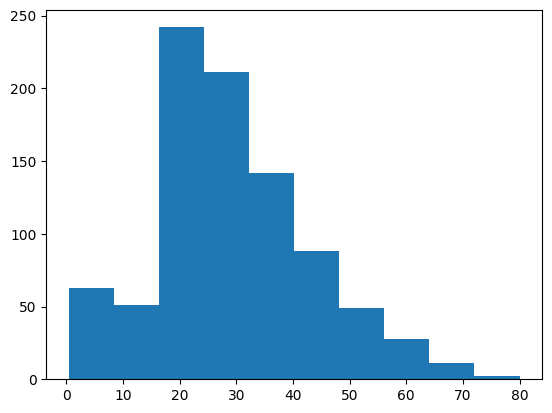

In [58]:
plt.hist(data["Age"])

Das Histogramm ist allerdings nicht sehr aussagekräftig ohne Achsenbeschriftung. Diese können wir mit `plt.xlabel` und `plt.ylabel` hinzufügen:

Text(0, 0.5, 'Count')

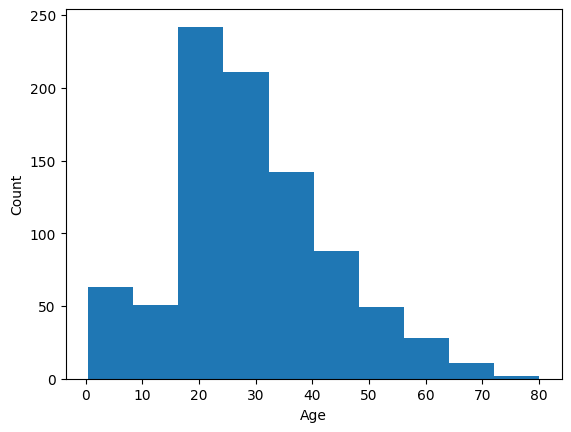

In [59]:
plt.hist(data["Age"])
plt.xlabel("Age")
plt.ylabel("Count")

Die "Bins" - also die Töpfe - unseres Histogramms werden automatisch gewählt. In unserem Fall ist aber ziemlich unbefriedigend, dass sie nicht genau mit 0, 10, 20, etc. übereinstimmen. Dies können wir aber mit dem Parameter "bins" beheben:

Text(0, 0.5, 'Count')

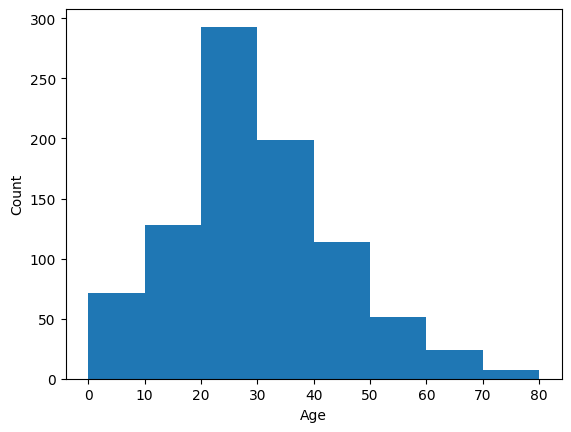

In [62]:
plt.hist(data["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])  # oder: range(0, 90, 10) 
plt.xlabel("Age")
plt.ylabel("Count")

Die Farbe können wir mit dem Parameter `color` bestimmen. Wir können entweder den Namen der Farbe angeben, oder ein Hashtag gefolgt von einem Hex-Code.

Text(0, 0.5, 'Count')

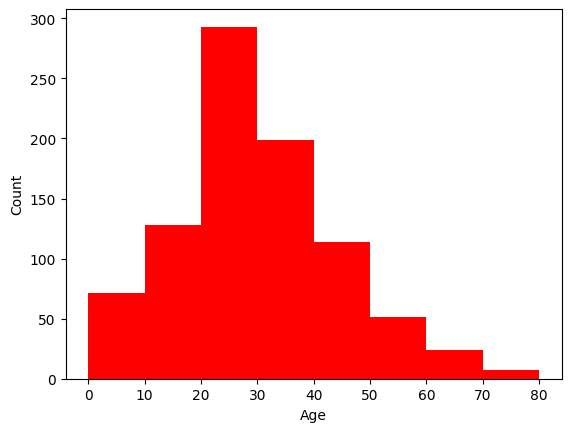

In [63]:
plt.hist(data["Age"], bins=range(0, 90, 10), color="red")
plt.xlabel("Age")
plt.ylabel("Count")

Wir können auch mehrere Verteilungen auf das gleiche Histogramm plotten. Zum Beispiel, wenn wir die Altersverteilung der Frauen mit der Verteilung der Männer vergleichen wollen. Dazu müssen wir einfach `plt.hist` mehrmals aufrufen, einmal für jede Verteilung, die wir darstellen wollen.

Wir können mit `plt.legend` auch noch eine Legende angeben. Dabei übergeben wir eine Liste, mit den Labels in der gleichen Reihenfolge wie `plt.hist` aufgerufen wurde.

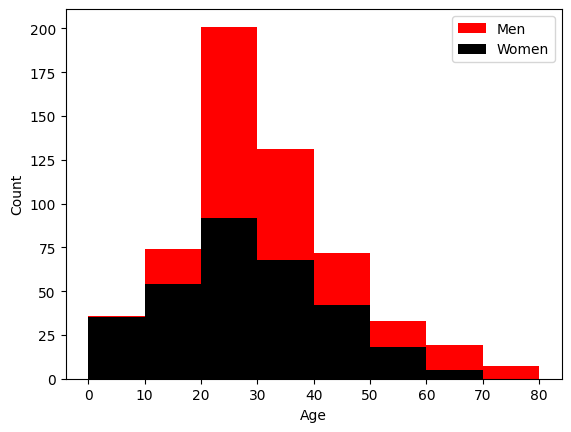

In [76]:
age_of_men = data["Age"][data["Sex"] == "male"]
age_of_women = data["Age"][data["Sex"] == "female"]

plt.hist(age_of_men, bins=range(0, 90, 10), color="red")
plt.hist(age_of_women, bins=range(0, 90, 10), color="black", alpha=1)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Men", "Women"])

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle ein Histogramm der Ticketpreise (Spalte "Fare"), mit sinnvollen Achsenbeschriftungen und Bins.

Text(0, 0.5, 'Count')

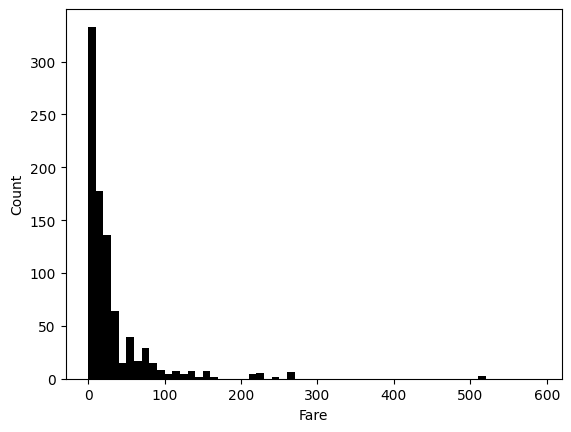

In [83]:
plt.hist(data["Fare"], bins=range(0, 600, 10), color="black", alpha=1)
plt.xlabel("Fare")
plt.ylabel("Count")

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle zwei Histogramme der Ticketpreise (Spalte "Fare"), einmal mit den Daten der Menschen, welche überlebt haben, und einmal mit den Daten der Menschen, welche nicht überlebt haben.

Tipp: Damit nicht eine Verteilung die andere überdeckt, kannst du in der Funktion `plt.hist` mit dem Parameter "alpha", zwischen 0 und 1, die Deckkraft steuern.

### 4.2 Einen Scatterplot erstellen
Wenn wir zwei Variablen miteinander vergleichen wollen, sind sogenannte Scatterplots sehr gut geeignet. Wenn wir zum Beispiel überprüfen wollen, ob das Alter mit dem gezahlten Preis korreliert, können wir dies wie folgt machen:


Text(0, 0.5, 'Fare')

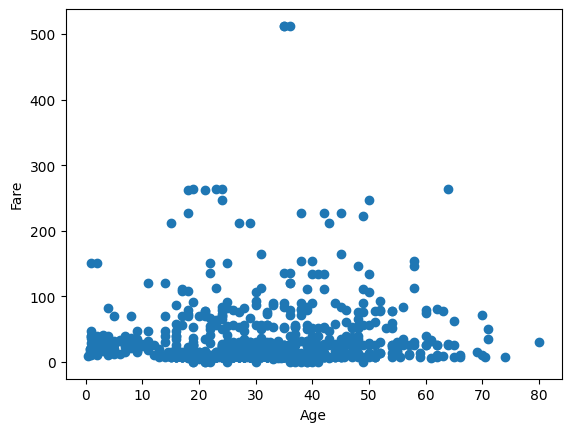

In [90]:
plt.scatter(data["Age"], data["Fare"])

# Auch für Scatterplots können wir die Achsenlabel so setzen
plt.xlabel("Age")
plt.ylabel("Fare")

Wir geben zuerst also die Variable auf der X-, dann auf der Y-Achse an.

Ansonsten funktioniert alles genau wie beim Histogramm. Um zum Beispiel einen zweifarbigen Scatterplot zu machen, können wir `plt.scatter` zweimal aufrufen.

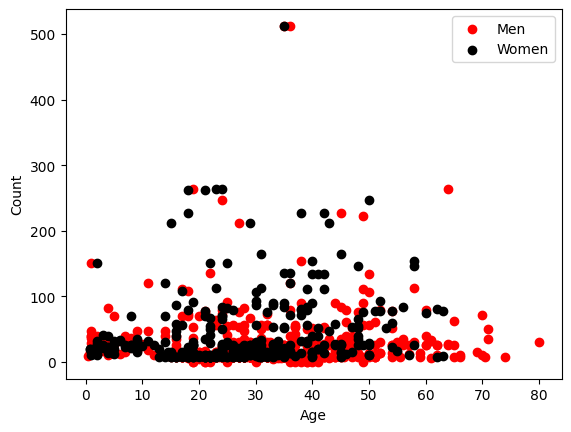

In [91]:
men = data["Sex"] == "male"
women = data["Sex"] == "female"

plt.scatter(data["Age"][men], data["Fare"][men], color="red")
plt.scatter(data["Age"][women], data["Fare"][women], color="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Men", "Women"])

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle einen Scatter-plot, welcher auf der X-Achse das Alter und auf der Y-Achse die Spalte "number_of_relatives" enthält.

<img src="https://i.imgur.com/JyhBeDB.png" class="exercise_image" width=100>

Erstelle denselben Scatter-Plot, aber färbe die Punkte unterschiedlich ein, je nachdem ob eine Person überlebt hat oder nicht.